Use K-Means to compress image

In [1]:
from sklearn.datasets import make_blobs
blobs,_ = make_blobs(n_samples=200, centers=3, random_state=12)
blobs[:10]

array([[-11.11848768,   7.43497569],
       [ -4.65017285,  -0.98363742],
       [ -7.51456607,   5.27345092],
       [ -4.06619864,   0.7211905 ],
       [ -8.73156369,   8.89254642],
       [ -7.40077458,   3.28790667],
       [ -9.42866001,   7.96533838],
       [ -8.77523846,   8.29225689],
       [ -5.25140891,   0.27890956],
       [ -8.73298866,   7.77518505]])

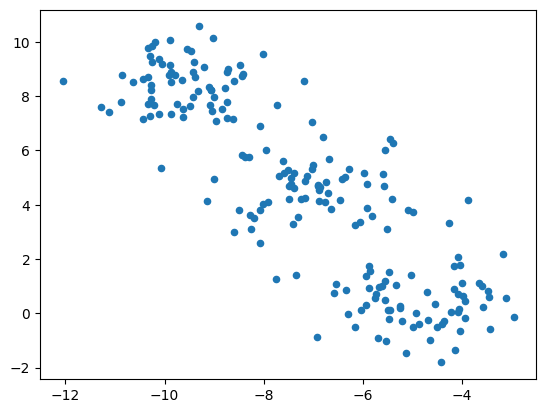

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(blobs[:, 0],blobs[:, 1],s=20)

generate random k points for central of the cluster

In [3]:
import numpy as np
def random_k(k,data):
    prng = np.random.RandomState(2)
    num_features = data.shape[1]
    ini_centers = prng.randn(k,num_features) * 5
    return ini_centers
ini_centers = random_k(3,blobs)
ini_centers

array([[ -2.08378924,  -0.28133414],
       [-10.68098048,   8.20135404],
       [ -8.96717793,  -4.20873683]])

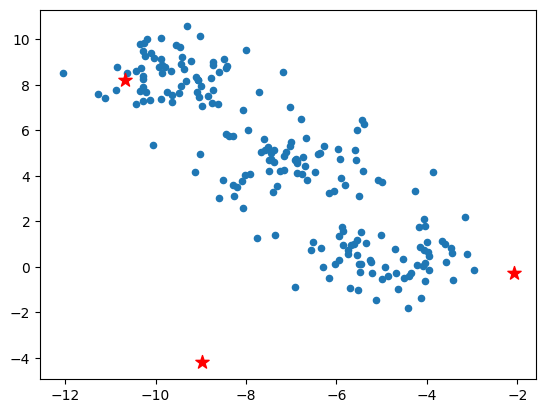

In [4]:
plt.scatter(blobs[:, 0],blobs[:, 1],s=20)
plt.scatter(ini_centers[:, 0],ini_centers[:, 1],s=100,marker='*',c = "r")

Calculate the distance from sample to central point

In [5]:
def d_euc(x,y):
    d =  np.sqrt(np.sum(np.square(x-y)))
    return d

We need t minimize SSE to update the cluster center.
$$ \text{SSE(C)} = \sum_{k=1}^K\sum_{x_i \in C_k} \|x_i - c_k\|^2 $$

where dataset D = {x1,x2,...,xn},
C indicate the type set C = {C1,C2,...Ck} after K-Means clustering,ck is the center of Ck, ck can be calucated through:
$$ c_k = \frac{\sum_{x_i \in C_k} x_i}{I(C_k)} $$

In [6]:
def update_center(clusters, data, centers):
    num_centers = np.shape(centers)[0]
    container = [[] for _ in range(num_centers)]

    for i, cluster in enumerate(clusters):
        container[cluster].append(data[i])

    new_centers = []
    for i in range(len(container)):
        if len(container[i]) > 0:
            new_center = np.mean(container[i], axis=0)
        else:
            new_center = centers[i]  # Keep the old center if the cluster is empty
        new_centers.append(new_center)
    
    return np.vstack(new_centers)

In [7]:
def kmeans_cluster(k,data,ini_centers):
    max_inter = 50
    epsilon = 0.1
    
    old_centers = ini_centers
    
    centers_cont = []
    clusters_cont = []
    centers_cont.append(old_centers)
    for i in range(max_inter):
        clusters = np.array([],dtype = int)
        for point in data:
            distances = np.array([])
            for center in old_centers:
                distances = np.append(distances,d_euc(point,center))
            cluster = np.argmin(distances)
            clusters = np.append(clusters,cluster)
        clusters_cont.append(clusters)
        
        new_centers = update_center(clusters,data,old_centers)
        
        difference = []
        for each_old_center, each_new_center in zip(old_centers, new_centers):
            difference.append(d_euc(each_old_center, each_new_center))

        if (np.array(difference) < epsilon).all():
            return centers_cont,clusters_cont
        centers_cont.append(new_centers)
        old_centers = new_centers
        
    return centers_cont,clusters_cont

In [8]:
centers_cont,clusters_cont = kmeans_cluster(3,blobs,ini_centers)
final_center = centers_cont[-1]
final_cluster = clusters_cont[-1]
final_center


array([[-4.93766524,  0.3787671 ],
       [-9.54466133,  8.38235926],
       [-6.92871686,  4.55293504]])

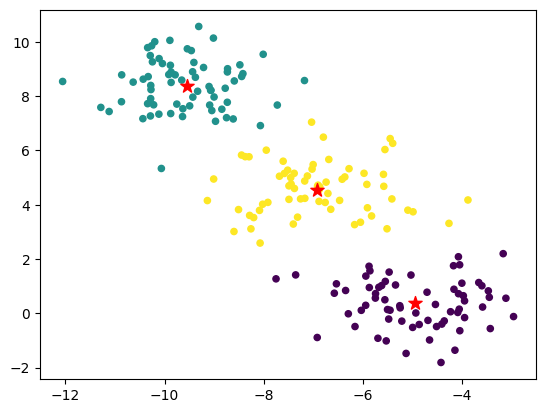

In [9]:
plt.scatter(blobs[:, 0],blobs[:, 1],s=20,c = final_cluster)
plt.scatter(final_center[:, 0],final_center[:, 1],s=100,marker='*',c = "r")

Text(0.5, 1.0, 'final center')

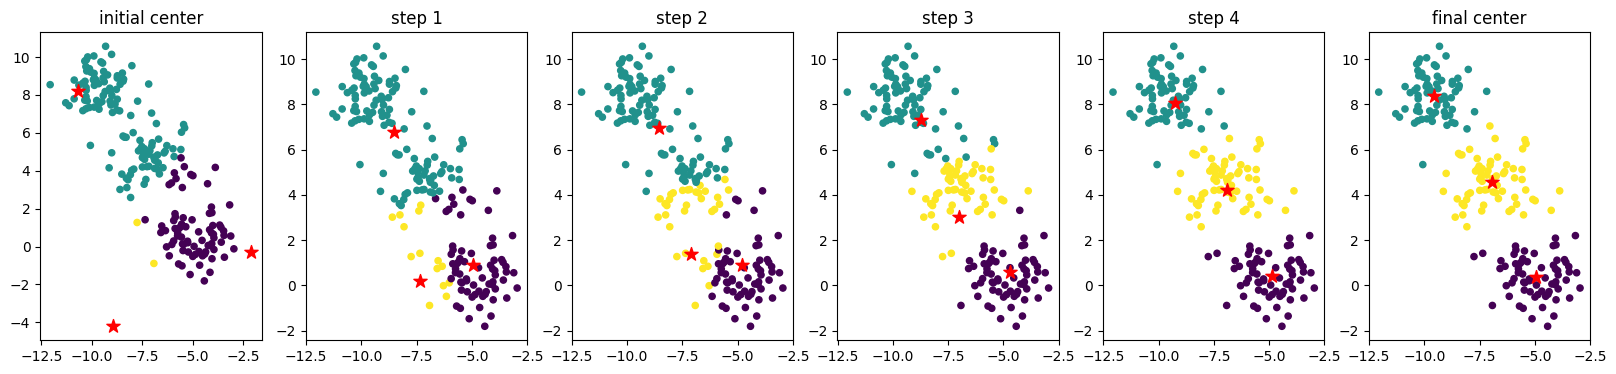

In [10]:
num_axes = len(centers_cont)

fig, axes = plt.subplots(1, num_axes, figsize=(20, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_cont[0])
axes[0].scatter(ini_centers[:, 0], ini_centers[:, 1], s=100, marker="*", c="r")
axes[0].set_title("initial center")

for i in range(1, num_axes - 1):
    axes[i].scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_cont[i])
    axes[i].scatter(
        centers_cont[i][:, 0], centers_cont[i][:, 1], s=100, marker="*", c="r"
    )
    axes[i].set_title("step {}".format(i))

axes[-1].scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_cont[-1])
axes[-1].scatter(final_center[:, 0], final_center[:, 1], s=100, marker="*", c="r")
axes[-1].set_title("final center")

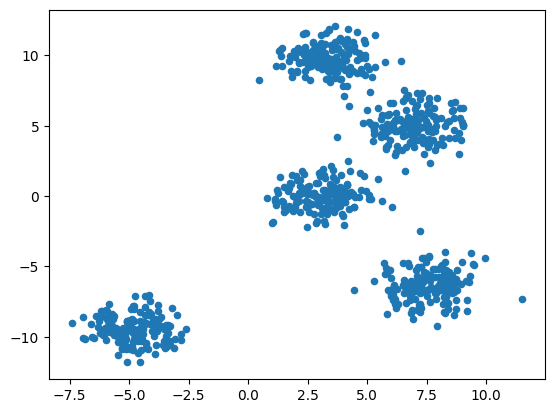

In [11]:
blobs_plus, _ = make_blobs(n_samples=800, centers=5, random_state=18) 
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)  

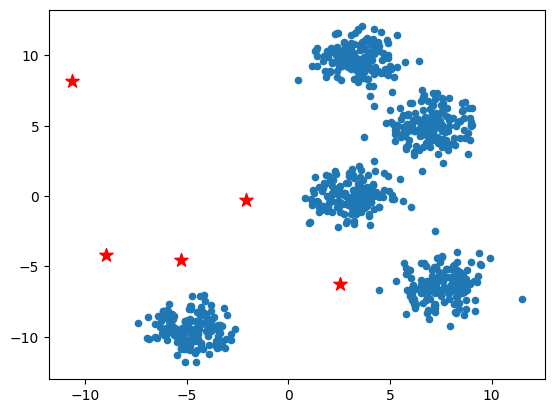

In [12]:
km_init_center = random_k(5, blobs_plus)

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20)
plt.scatter(km_init_center[:, 0], km_init_center[:, 1], s=100, marker="*", c="r")

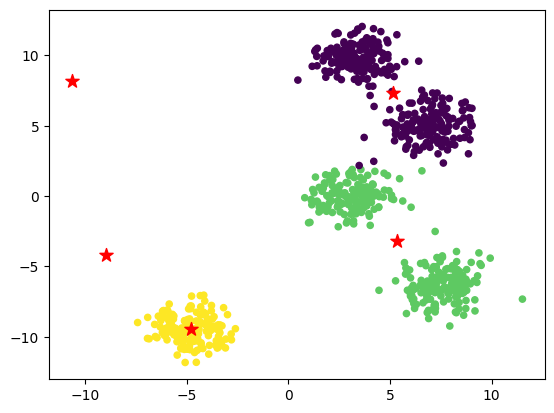

In [13]:
km_centers, km_clusters = kmeans_cluster(5,blobs_plus, km_init_center)
km_final_center = km_centers[-1]
km_final_cluster = km_clusters[-1]
plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=km_final_cluster)
plt.scatter(km_final_center[:, 0], km_final_center[:, 1], s=100, marker="*", c="r")

In [14]:
import numpy as np
def get_sum_distance(centers,data):
    distance_cont = np.array([])
    for each_data in data:
        distance = np.array([])
        for each_center in centers:
            distance = np.append(distance,d_euc(each_data,each_center))
        lab = np.argmin(distance)
        distance_cont = np.append(distance_cont,distance[lab])
    return np.sum(distance_cont),distance_cont

In [15]:
def get_init_center(data,k):
    seed = np.random.RandomState(20)
    p = seed.randint(0,len(data))
    first_center = data[p]
    
    center_container = []
    center_container.append(first_center)
    for i in range(k-1):
        sum_distance,distance_cont = get_sum_distance(center_container,data)
        r = np.random.randint(0,sum_distance)
        for j in range(len(distance_cont)):
            r -= distance_cont[j]
            if r <= 0:
                center_container.append(data[j])
                break
            else:
                pass
    return np.array(center_container)

In [16]:
plus_init_center = get_init_center(blobs_plus, 5)
plus_init_center

array([[ 4.1661903 ,  0.81807492],
       [-5.87123226, -7.67877882],
       [ 2.83152256, 10.66721901],
       [ 8.86284438,  3.00632831],
       [ 7.68107986, -6.46080957]])

Text(0.5, 1.0, 'final center')

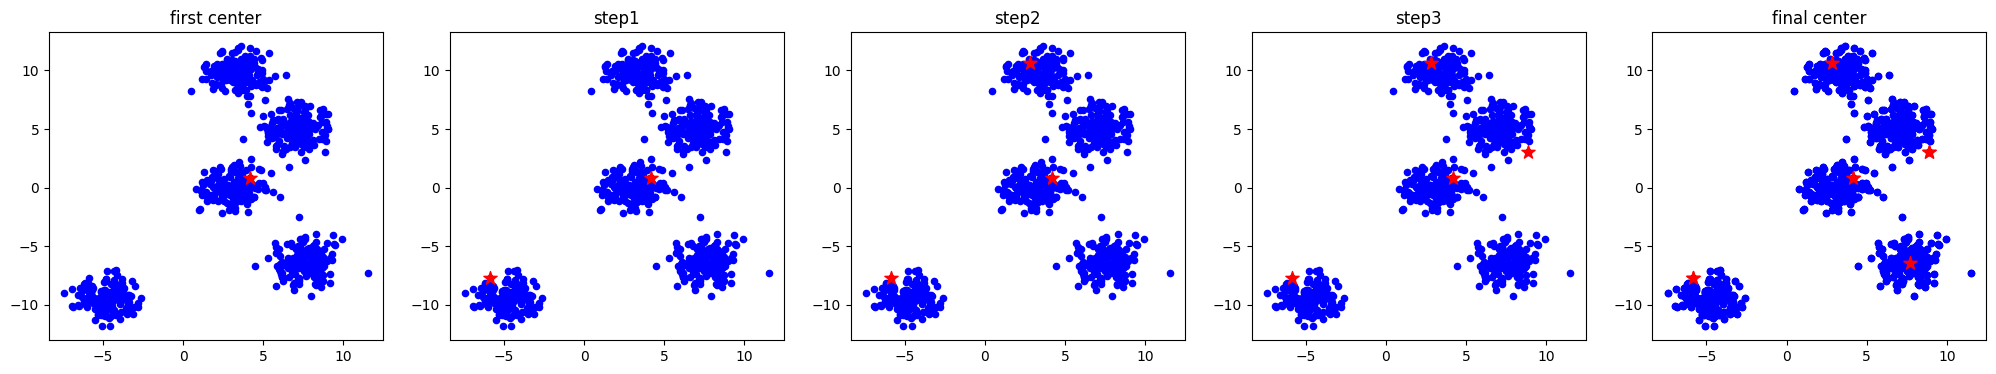

In [17]:
num = len(plus_init_center)

fig, axes = plt.subplots(1, num, figsize=(25, 4))

axes[0].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[0].scatter(
    plus_init_center[0, 0], plus_init_center[0, 1], s=100, marker="*", c="r"
)
axes[0].set_title("first center")

for i in range(1, num):
    axes[i].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
    axes[i].scatter(
        plus_init_center[: i + 1, 0],
        plus_init_center[: i + 1, 1],
        s=100,
        marker="*",
        c="r",
    )
    axes[i].set_title("step{}".format(i))

axes[-1].scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c="b")
axes[-1].scatter(
    plus_init_center[:, 0], plus_init_center[:, 1], s=100, marker="*", c="r"
)
axes[-1].set_title("final center")

In [18]:
plus_centers, plus_clusters = kmeans_cluster(blobs_plus, plus_init_center, 5)
plus_final_center = plus_centers[-1]
plus_final_cluster = plus_clusters[-1]

plt.scatter(blobs_plus[:, 0], blobs_plus[:, 1], s=20, c=plus_final_cluster)
plt.scatter(plus_final_center[:, 0], plus_final_center[:, 1], s=100, marker="*", c="r")

TypeError: 'int' object is not iterable

Text(0.5, 1.0, 'Mini Batch K-Means')

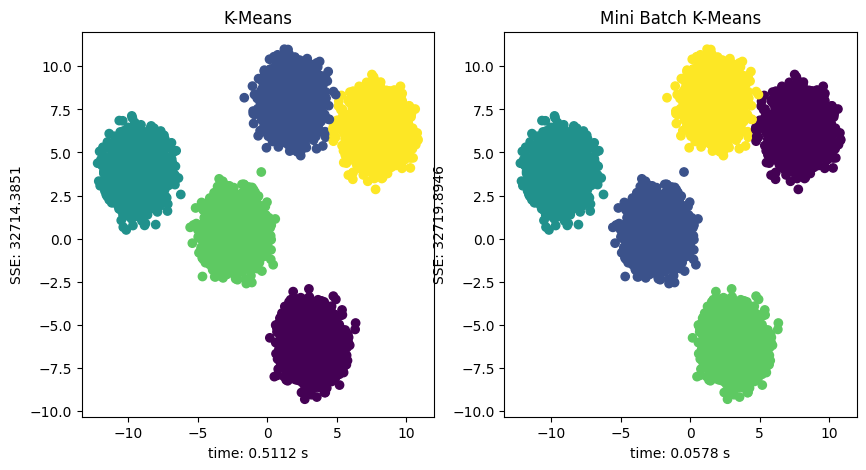

: 

In [ ]:
import time
from sklearn.cluster import MiniBatchKMeans, KMeans


test_data, _ = make_blobs(
    20000, n_features=2, cluster_std=0.9, centers=5, random_state=20
)

km = KMeans(n_clusters=5, n_init="auto")
mini_km = MiniBatchKMeans(n_clusters=5, n_init="auto")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, model in enumerate([km, mini_km]):
    t0 = time.time()
    model.fit(test_data)
    t1 = time.time()
    t = t1 - t0
    sse = model.inertia_
    axes[i].scatter(test_data[:, 0], test_data[:, 1], c=model.labels_)
    axes[i].set_xlabel("time: {:.4f} s".format(t))
    axes[i].set_ylabel("SSE: {:.4f}".format(sse))

axes[0].set_title("K-Means")
axes[1].set_title("Mini Batch K-Means")